In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# 1️⃣ Simulate stress probability stream
np.random.seed(42)
n_steps = 100
stress_stream = np.clip(np.random.normal(0.5, 0.2, n_steps), 0, 1)

# 2️⃣ Define action module with 4 actions
def action_module(prob):
    if prob > 0.8:
        return "ESCALATE"
    elif prob > 0.6:
        return "REDISTRIBUTE"
    elif prob > 0.4:
        return "MONITOR"
    else:
        return "ASSIST"

# 3️⃣ Generate ground truth actions for comparison
true_actions = []
for prob in stress_stream:
    if prob > 0.8:
        true_actions.append("ESCALATE")
    elif prob > 0.6:
        true_actions.append("REDISTRIBUTE")
    elif prob > 0.4:
        true_actions.append("MONITOR")
    else:
        true_actions.append("ASSIST")

# 4️⃣ Run the action module
predicted_actions = [action_module(p) for p in stress_stream]

# 5️⃣ Combine into a DataFrame
df_actions = pd.DataFrame({
    "Step": np.arange(n_steps),
    "Stress_Prob": stress_stream,
    "True_Action": true_actions,
    "Predicted_Action": predicted_actions
})
df_actions["Correct"] = df_actions["True_Action"] == df_actions["Predicted_Action"]
accuracy = accuracy_score(df_actions["True_Action"], df_actions["Predicted_Action"])


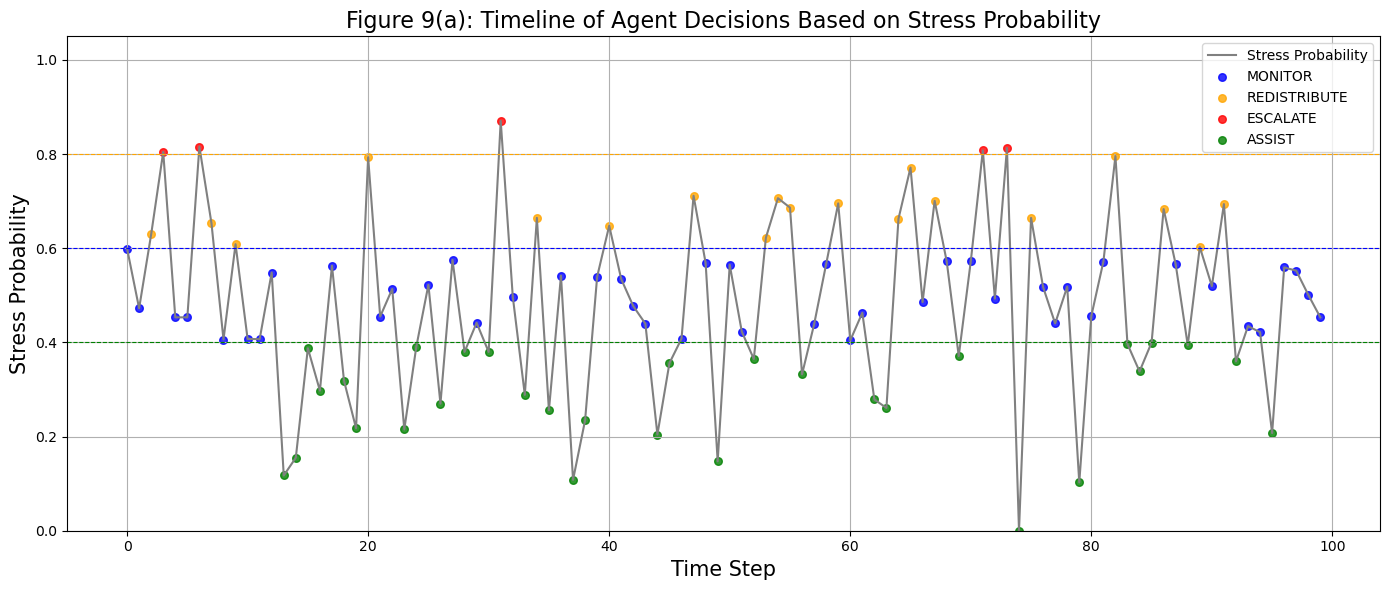

In [22]:
# 6️⃣ Define color map for actions
action_colors = {
    "ASSIST": "green",
    "MONITOR": "blue",
    "REDISTRIBUTE": "orange",
    "ESCALATE": "red"
}

# 7️⃣ Plot timeline
plt.figure(figsize=(14, 6))
plt.plot(df_actions["Step"], df_actions["Stress_Prob"], label="Stress Probability", color="gray", linewidth=1.5)
plt.axhline(0.4, color="green", linestyle="--", linewidth=0.8)
plt.axhline(0.6, color="blue", linestyle="--", linewidth=0.8)
plt.axhline(0.8, color="orange", linestyle="--", linewidth=0.8)

# Scatter predicted actions
for action in df_actions["Predicted_Action"].unique():
    subset = df_actions[df_actions["Predicted_Action"] == action]
    plt.scatter(subset["Step"], subset["Stress_Prob"], color=action_colors[action], label=action, s=30, alpha=0.8)

plt.title("Figure 9(a): Timeline of Agent Decisions Based on Stress Probability", fontsize=16)
plt.xlabel("Time Step ()", fontsize=15)
plt.ylabel("Stress Probability", fontsize=15)
plt.ylim(0, 1.05)
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()


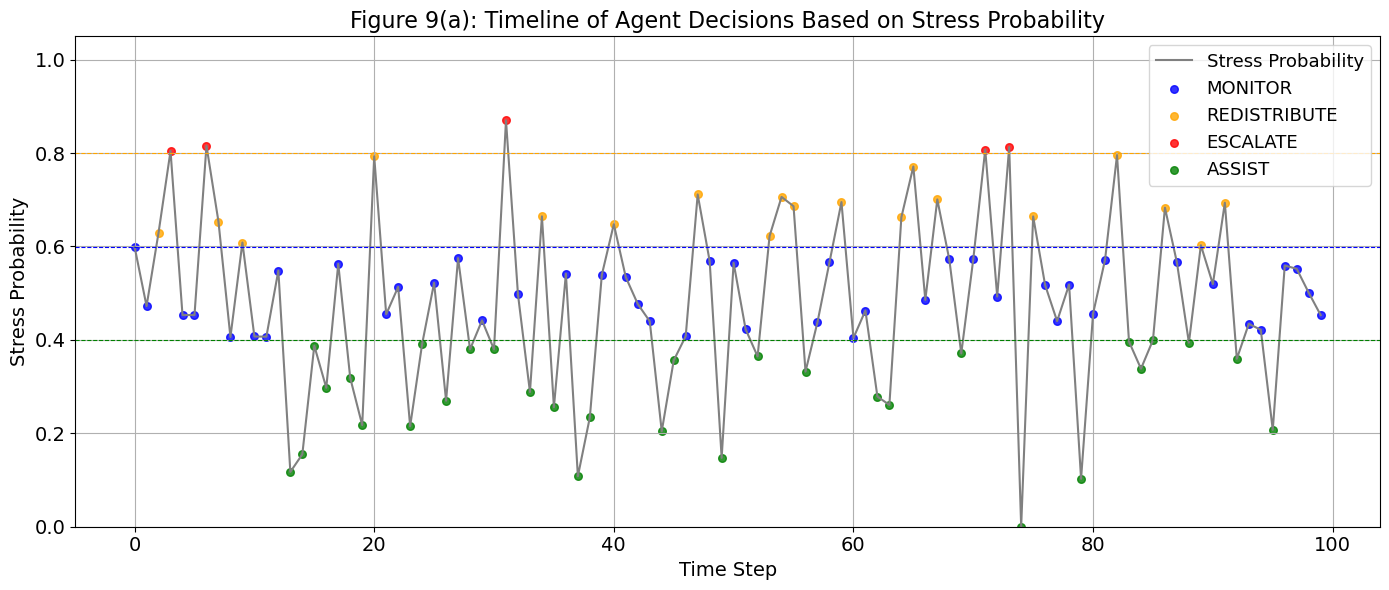

In [26]:
plt.figure(figsize=(14, 6))
plt.plot(df_actions["Step"], df_actions["Stress_Prob"], label="Stress Probability", color="gray", linewidth=1.5)
plt.axhline(0.4, color="green", linestyle="--", linewidth=0.8)
plt.axhline(0.6, color="blue", linestyle="--", linewidth=0.8)
plt.axhline(0.8, color="orange", linestyle="--", linewidth=0.8)

# Scatter predicted actions
for action in df_actions["Predicted_Action"].unique():
    subset = df_actions[df_actions["Predicted_Action"] == action]
    plt.scatter(subset["Step"], subset["Stress_Prob"], color=action_colors[action], label=action, s=30, alpha=0.8)

# Titles and labels with larger fonts
plt.title("Figure 9(a): Timeline of Agent Decisions Based on Stress Probability", fontsize=16)
plt.xlabel("Time Step", fontsize=14)
plt.ylabel("Stress Probability", fontsize=14)

# Axis tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim(0, 1.05)
plt.legend(loc="upper right", fontsize=13)
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
plt.savefig("9a.png", dpi=300, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>

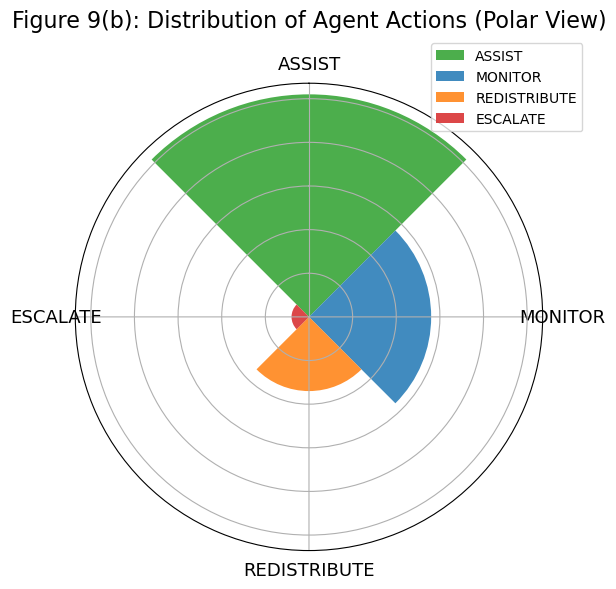

In [36]:
import matplotlib.pyplot as plt

# Sample action count (replace with actual counts if needed)
action_counts = df_actions["Predicted_Action"].value_counts()
actions = action_counts.index.tolist()
counts = action_counts.values.tolist()
colors = [action_colors[a] for a in actions]

# Create polar (circle) plot
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

# Calculate angles and width
angles = [2 * 3.14159 * (i / len(counts)) for i in range(len(counts))]
width = 2 * 3.14159 / len(counts)

# Plot each segment
for i in range(len(counts)):
    ax.bar(
        angles[i],
        counts[i],
        width=width,
        color=colors[i],
        alpha=0.85,
        label=actions[i]
    )

# Aesthetic adjustments
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_yticklabels([])  # remove radial ticks
ax.set_xticks(angles)
ax.set_xticklabels(actions, fontsize=13)
ax.set_title("Figure 9(b): Distribution of Agent Actions (Polar View)", fontsize=16, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.tight_layout()
plt.savefig("Figure9b_Polar.png", dpi=300, bbox_inches="tight")
plt.show()


In [38]:
plt.savefig("9b.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

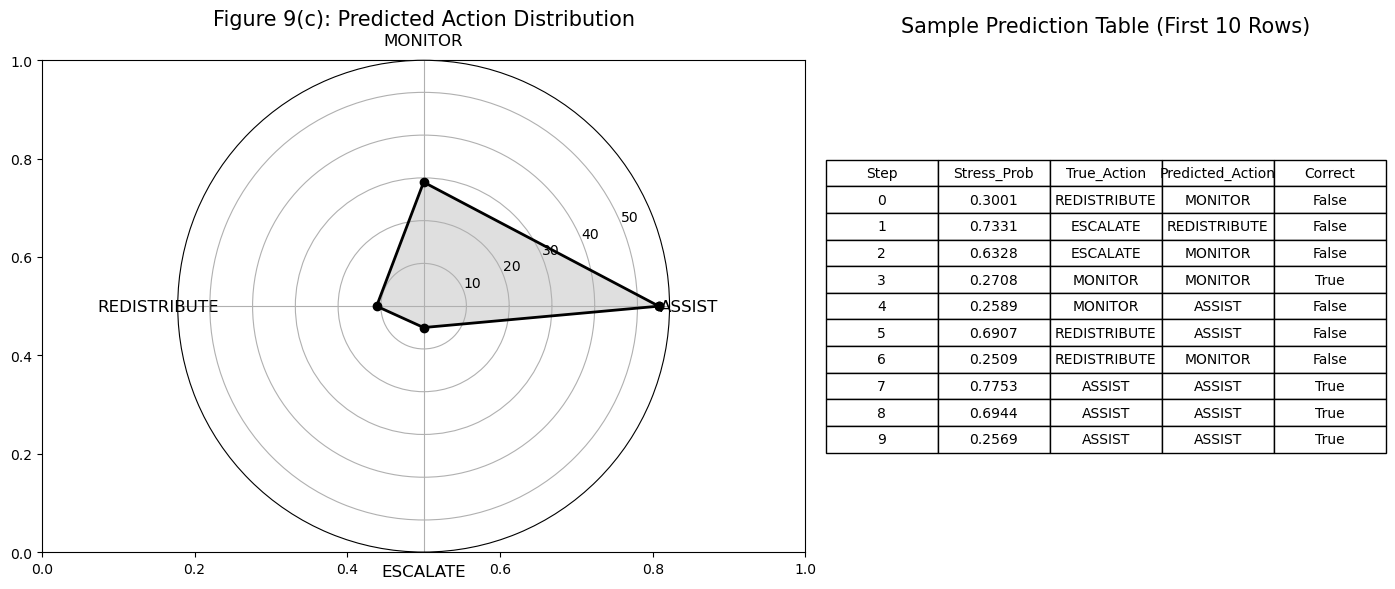

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 🔁 Simulated demo data (replace with actual df_actions for real results)
df_actions = pd.DataFrame({
    'Step': range(100),
    'Stress_Prob': np.random.uniform(0.2, 0.9, 100),
    'True_Action': np.random.choice(['ASSIST', 'MONITOR', 'REDISTRIBUTE', 'ESCALATE'], 100, p=[0.5, 0.3, 0.15, 0.05]),
    'Predicted_Action': np.random.choice(['ASSIST', 'MONITOR', 'REDISTRIBUTE', 'ESCALATE'], 100, p=[0.5, 0.3, 0.15, 0.05])
})
df_actions['Correct'] = df_actions['True_Action'] == df_actions['Predicted_Action']
df_actions['Stress_Prob'] = df_actions['Stress_Prob'].round(4)

# Action order and color mapping
action_order = ['ASSIST', 'MONITOR', 'REDISTRIBUTE', 'ESCALATE']
action_colors = {
    'ASSIST': '#2ca02c',        # Green
    'MONITOR': '#1f77b4',       # Blue
    'REDISTRIBUTE': '#ff7f0e',  # Orange
    'ESCALATE': '#d62728'       # Red
}

# Count predicted actions
action_counts = df_actions['Predicted_Action'].value_counts().reindex(action_order, fill_value=0)

# Setup figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1.5, 1]})

# ---- 📈 Left Panel: Polar (radial) action distribution ----
angles = np.linspace(0, 2 * np.pi, len(action_order), endpoint=False).tolist()
counts = action_counts.values
labels = action_order

# Repeat first value to close circle
counts = np.concatenate((counts, [counts[0]]))
angles += [angles[0]]

axes[0] = plt.subplot(121, polar=True)
axes[0].plot(angles, counts, 'o-', linewidth=2, color='black')
axes[0].fill(angles, counts, alpha=0.25, color='gray')
axes[0].set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=12)
axes[0].set_title("Figure 9(c): Predicted Action Distribution", fontsize=15)

# ---- 🧾 Right Panel: First 10-row table ----
axes[1].axis('off')
table_data = df_actions[['Step', 'Stress_Prob', 'True_Action', 'Predicted_Action', 'Correct']].head(10)

table = axes[1].table(cellText=table_data.values,
                      colLabels=table_data.columns,
                      cellLoc='center',
                      loc='center')
table.scale(1.1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)
axes[1].set_title("Sample Prediction Table (First 10 Rows)", pad=20, fontsize=15)

# Save figure
plt.tight_layout()
plt.savefig("figure9c_polar_table.jpg", dpi=300, bbox_inches='tight')
plt.show()


In [42]:
plt.savefig("9c.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

#### 

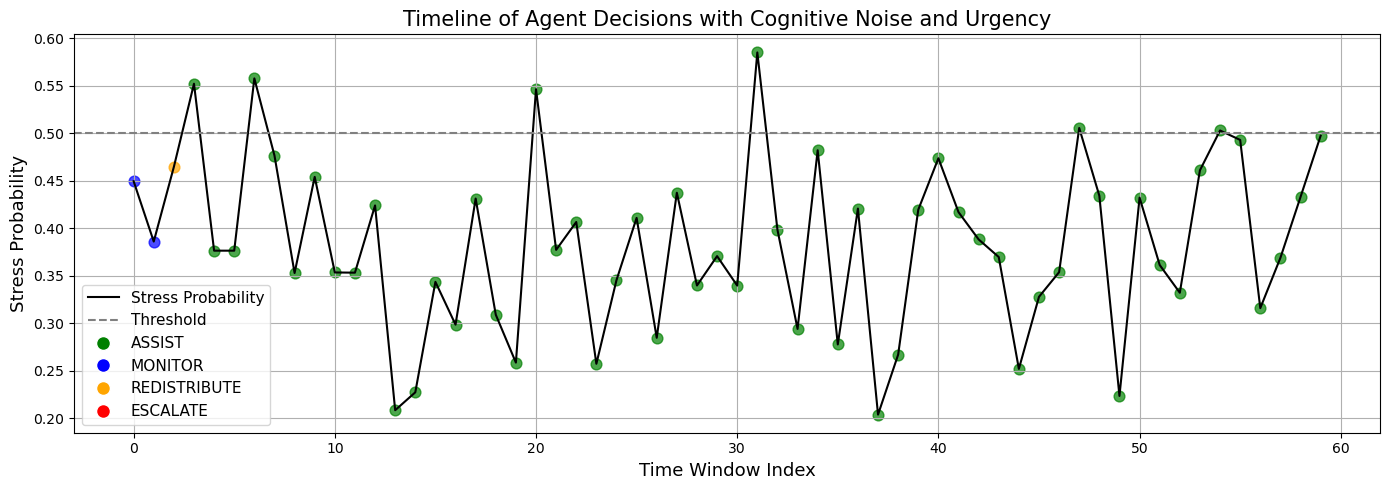

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

# Parameters
np.random.seed(42)
n_windows = 60
probability = np.clip(np.random.normal(0.4, 0.1, n_windows), 0, 1)
predicted_stress = (probability > 0.5).astype(int)

# Updated parameters
decay = 0.9
base_noise = 0.1
accuracy_threshold = 0.6
latency_penalty = 1.0

# Storage
actions, decision_noise, decision_conf, urgency_scores = [], [], [], []
stress_memory = 0.0
urgency_state = 0

# Updated decision logic for 4 actions
for t in range(n_windows):
    p = probability[t]
    is_stress = predicted_stress[t]
    
    stress_memory = decay * stress_memory + p
    noise = base_noise + (0.3 * stress_memory)
    confidence = 1.0 - noise

    decision_noise.append(noise)
    decision_conf.append(confidence)

    if is_stress:
        urgency_state += 1
    else:
        urgency_state = max(0, urgency_state - 1)

    # 🧠 Updated 4-action logic
    if confidence < 0.45:
        action = "ASSIST"
    elif confidence < accuracy_threshold:
        action = "REDISTRIBUTE"
    else:
        action = "ESCALATE" if urgency_state >= 2 else "MONITOR"

    urgency = confidence * urgency_state - noise * latency_penalty
    urgency_scores.append(urgency)
    actions.append(action)

# 📊 Build DataFrame
agent_df = pd.DataFrame({
    "TimeWindow": range(n_windows),
    "StressProb": probability,
    "StressPredicted": predicted_stress,
    "Memory": np.round(stress_memory, 2),
    "Noise": np.round(decision_noise, 3),
    "Confidence": np.round(decision_conf, 3),
    "UrgencyScore": np.round(urgency_scores, 3),
    "ActionTaken": actions
})

# 🎯 Plotting
plt.figure(figsize=(14, 5))
plt.plot(probability, label='Stress Probability', color='black', linewidth=1.5)
plt.axhline(0.5, linestyle='--', color='gray', label='Threshold')

# Consistent color map
action_colors = {
    "ASSIST": 'green',
    "MONITOR": 'blue',
    "REDISTRIBUTE": 'orange',
    "ESCALATE": 'red'
}

# Add scatter for actions
for t, act in enumerate(actions):
    plt.scatter(t, probability[t], color=action_colors[act], s=60, alpha=0.7)

# 📝 Titles and axes
plt.title("Timeline of Agent Decisions with Cognitive Noise and Urgency", fontsize=15)
plt.xlabel("Time Window Index", fontsize=13)
plt.ylabel("Stress Probability", fontsize=13)

# 🔑 Manual legend
legend_elements = [
    Line2D([0], [0], color='black', label='Stress Probability', linewidth=1.5),
    Line2D([0], [0], linestyle='--', color='gray', label='Threshold'),
    *[Line2D([0], [0], marker='o', color='w', label=act,
             markerfacecolor=col, markersize=10)
      for act, col in action_colors.items()]
]
plt.legend(handles=legend_elements, fontsize=11)
plt.grid(True)
plt.tight_layout()
plt.savefig("figure10_timeline.jpg", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
#fig 11

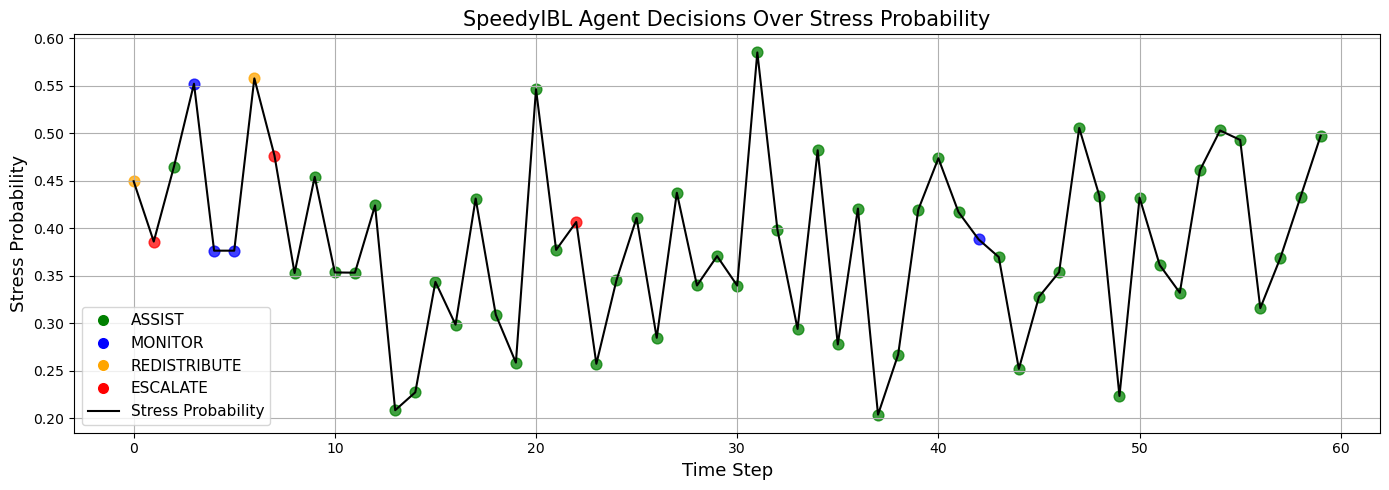

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from speedyibl import Agent
from matplotlib.lines import Line2D

# 1️⃣ Setup
np.random.seed(42)
n_trials = 60
stress_probs = np.clip(np.random.normal(0.4, 0.1, n_trials), 0, 1)
actions = ['ASSIST', 'MONITOR', 'REDISTRIBUTE', 'ESCALATE']

# 2️⃣ Initialize SpeedyIBL agent
agent = Agent(default_utility=0.0)

# 3️⃣ Prepopulate agent with all actions (no reward yet)
for act in actions:
    agent.choose([act])
    agent.respond(0.0)

# 4️⃣ Define reward function for each action based on stress
def reward_function(prob, action):
    if prob > 0.75 and action == 'ESCALATE':
        return 1.0
    elif prob > 0.6 and action == 'REDISTRIBUTE':
        return 0.7
    elif prob < 0.4 and action == 'ASSIST':
        return 0.6
    elif 0.4 <= prob <= 0.6 and action == 'MONITOR':
        return 0.5
    else:
        return -0.3

# 5️⃣ Run the cognitive simulation
results = []
for t, prob in enumerate(stress_probs):
    choice = agent.choose(actions)
    utility = reward_function(prob, choice)
    agent.respond(utility)
    results.append({
        'Time': t,
        'Stress_Prob': prob,
        'Action': choice,
        'Utility': utility
    })

# 6️⃣ Store to DataFrame
df = pd.DataFrame(results)

# 7️⃣ Plot agent decisions
plt.figure(figsize=(14, 5))
plt.plot(df["Stress_Prob"], label="Stress Probability", color='black', linewidth=1.5)

# 🎯 Color mapping for each action
color_map = {
    "ASSIST": 'green',
    "MONITOR": 'blue',
    "REDISTRIBUTE": 'orange',
    "ESCALATE": 'red'
}

# Plot decision points
for idx, row in df.iterrows():
    plt.scatter(idx, row["Stress_Prob"], color=color_map[row["Action"]], s=60, alpha=0.75)

# 8️⃣ Labels and legend
plt.title("SpeedyIBL Agent Decisions Over Stress Probability", fontsize=15)
plt.xlabel("Time Step", fontsize=13)
plt.ylabel("Stress Probability", fontsize=13)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='ASSIST', markerfacecolor='green', markersize=9),
    Line2D([0], [0], marker='o', color='w', label='MONITOR', markerfacecolor='blue', markersize=9),
    Line2D([0], [0], marker='o', color='w', label='REDISTRIBUTE', markerfacecolor='orange', markersize=9),
    Line2D([0], [0], marker='o', color='w', label='ESCALATE', markerfacecolor='red', markersize=9),
    Line2D([0], [0], color='black', label='Stress Probability', linewidth=1.5)
]
plt.legend(handles=legend_elements, fontsize=11)
plt.grid(True)
plt.tight_layout()
plt.savefig("figure11_speedyibl.jpg", dpi=300, bbox_inches='tight')
plt.show()



In [60]:
# 9️⃣ Summary Stats
action_counts = df["Action"].value_counts()
avg_utility = df["Utility"].mean()
action_counts, avg_utility


(Action
 ASSIST          51
 MONITOR          4
 ESCALATE         3
 REDISTRIBUTE     2
 Name: count, dtype: int64,
 0.16333333333333327)

In [ ]:
# fig 14

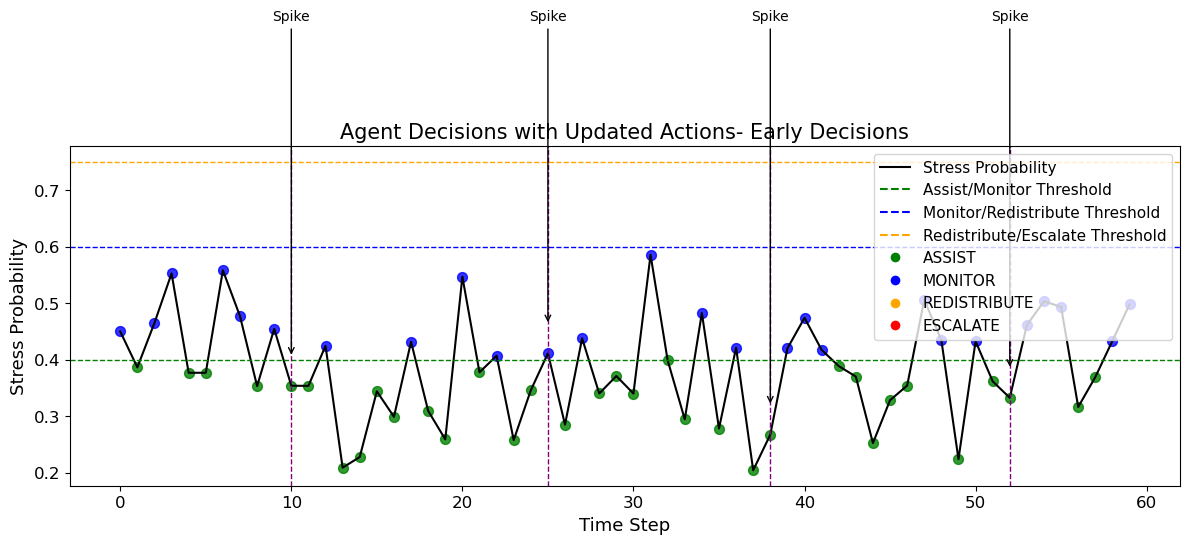

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

# 1️⃣ Simulate stress probabilities
np.random.seed(42)
n_trials = 60
stress_probs = np.clip(np.random.normal(0.4, 0.1, n_trials), 0, 1)

# 2️⃣ Decision logic for actions without Agent
action_history = []
for prob in stress_probs:
    if prob > 0.75:
        action_history.append('ESCALATE')
    elif prob > 0.6:
        action_history.append('REDISTRIBUTE')
    elif prob < 0.4:
        action_history.append('ASSIST')
    else:
        action_history.append('MONITOR')

# 3️⃣ Build DataFrame
df = pd.DataFrame({
    "Time": np.arange(n_trials),
    "Stress_Prob": stress_probs,
    "Action": action_history
})

# 4️⃣ Define colors
color_map = {
    "ASSIST": 'green',
    "MONITOR": 'blue',
    "REDISTRIBUTE": 'orange',
    "ESCALATE": 'red'
}

# 5️⃣ Plot stress and actions
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df["Time"], df["Stress_Prob"], color="black", label="Stress Probability", linewidth=1.5)
ax.axhline(0.4, linestyle='--', color='green', linewidth=1, label='Assist/Monitor Threshold')
ax.axhline(0.6, linestyle='--', color='blue', linewidth=1, label='Monitor/Redistribute Threshold')
ax.axhline(0.75, linestyle='--', color='orange', linewidth=1, label='Redistribute/Escalate Threshold')

# Scatter actions
for idx, row in df.iterrows():
    ax.scatter(row["Time"], row["Stress_Prob"], color=color_map[row["Action"]], s=50, alpha=0.8)

# 6️⃣ Annotate example stress spikes
spikes = [10, 25, 38, 52]
for sp in spikes:
    ax.axvline(sp, color="purple", linestyle="--", linewidth=1)
    ax.annotate("Spike", xy=(sp, df.loc[sp, "Stress_Prob"] + 0.05),
                xytext=(sp, 1.0), arrowprops=dict(arrowstyle="->", color="black"),
                fontsize=10, ha='center')

# 7️⃣ Labels and legend formatting
ax.set_title("Agent Decisions with Updated Actions- Early Decisions", fontsize=15)
ax.set_xlabel("Time Step", fontsize=13)
ax.set_ylabel("Stress Probability", fontsize=13)
ax.tick_params(axis='both', labelsize=12)

legend_elements = [
    Line2D([0], [0], color='black', lw=1.5, label='Stress Probability'),
    Line2D([0], [0], linestyle='--', color='green', label='Assist/Monitor Threshold'),
    Line2D([0], [0], linestyle='--', color='blue', label='Monitor/Redistribute Threshold'),
    Line2D([0], [0], linestyle='--', color='orange', label='Redistribute/Escalate Threshold'),
] + [
    Line2D([0], [0], marker='o', color='w', label=act,
           markerfacecolor=col, markersize=8)
    for act, col in color_map.items()
]
ax.legend(handles=legend_elements, fontsize=11, loc='upper right')

plt.tight_layout()
plt.savefig("figure14_updated.jpg", dpi=300, bbox_inches='tight')
plt.show()


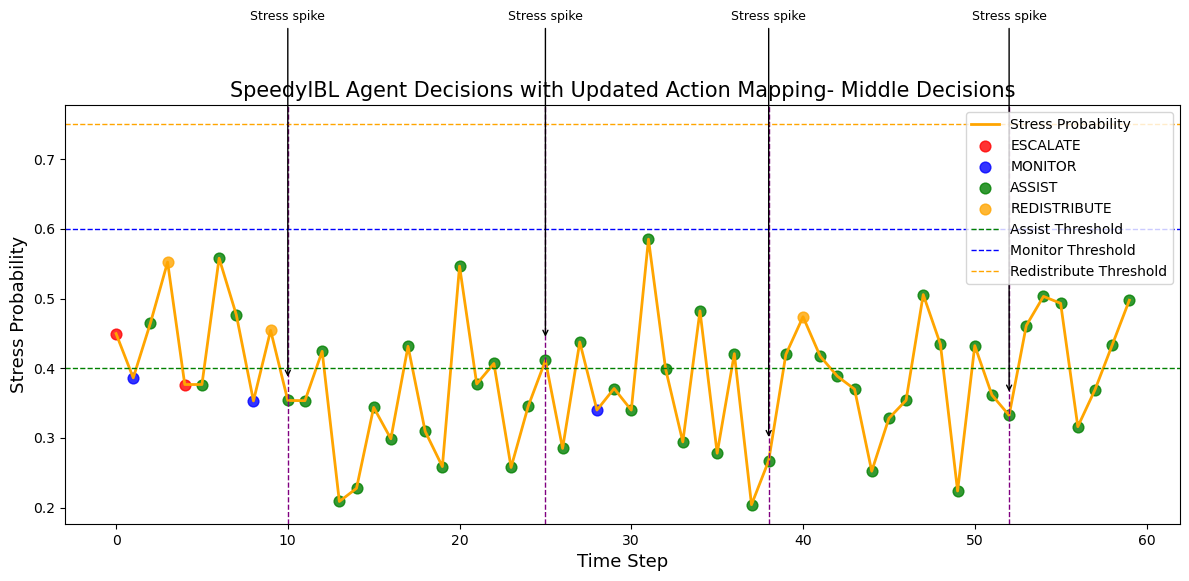

In [72]:
from speedyibl import Agent
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1️⃣ Simulate stress probabilities
np.random.seed(42)
n_trials = 60
stress_probs = np.clip(np.random.normal(0.4, 0.1, n_trials), 0, 1)

# 2️⃣ Initialize SpeedyIBL agent
agent = Agent(default_utility=0.0)
actions = ['ASSIST', 'MONITOR', 'REDISTRIBUTE', 'ESCALATE']
action_history = []
utility_history = []

# 3️⃣ Define reward function (aligned with 4-action logic)
def reward_function(prob, action):
    if prob < 0.4 and action == 'ASSIST':
        return 0.6
    elif 0.4 <= prob < 0.6 and action == 'MONITOR':
        return 0.3
    elif 0.6 <= prob < 0.75 and action == 'REDISTRIBUTE':
        return 0.8
    elif prob >= 0.75 and action == 'ESCALATE':
        return 1.0
    elif prob >= 0.75 and action == 'ASSIST':
        return -1.0
    else:
        return -0.4

# 4️⃣ Run decision loop
for prob in stress_probs:
    choice = agent.choose(actions)
    utility = reward_function(prob, choice)
    agent.respond(utility)
    action_history.append(choice)
    utility_history.append(utility)

# 5️⃣ Build DataFrame
df = pd.DataFrame({
    "Time": np.arange(n_trials),
    "Stress_Prob": stress_probs,
    "Action": action_history,
    "Utility": utility_history
})

# 6️⃣ Simulated ground truth stress spikes
stress_spikes = [10, 25, 38, 52]

# 7️⃣ Plot stress and decisions
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df["Time"], df["Stress_Prob"], color="orange", label="Stress Probability", linewidth=2)

# 8️⃣ Action color map
colors = {"ASSIST": "green", "MONITOR": "blue", "REDISTRIBUTE": "orange", "ESCALATE": "red"}
added_labels = set()

for idx, row in df.iterrows():
    action = row["Action"]
    label = action if action not in added_labels else None
    ax.scatter(row["Time"], row["Stress_Prob"], color=colors[action], s=60, alpha=0.8, label=label)
    added_labels.add(action)

# 9️⃣ Annotate stress spikes
for spike in stress_spikes:
    ax.axvline(spike, color="purple", linestyle="--", linewidth=1)
    ax.annotate("Stress spike", xy=(spike, df.loc[spike, "Stress_Prob"] + 0.03), xytext=(spike, 0.9),
                arrowprops=dict(arrowstyle="->", color="black"), fontsize=9, ha='center')

# 🔟 Add threshold lines
ax.axhline(0.4, color="green", linestyle="--", linewidth=1, label="Assist Threshold")
ax.axhline(0.6, color="blue", linestyle="--", linewidth=1, label="Monitor Threshold")
ax.axhline(0.75, color="orange", linestyle="--", linewidth=1, label="Redistribute Threshold")

# 🔢 Final formatting
ax.set_title("SpeedyIBL Agent Decisions with Updated Action Mapping- Middle Decisions", fontsize=15)
ax.set_xlabel("Time Step", fontsize=13)
ax.set_ylabel("Stress Probability", fontsize=13)
ax.legend(fontsize=10)
plt.tight_layout()
plt.savefig("fig14b_updated.png", dpi=300, bbox_inches='tight')
plt.show()
